<a href="https://www.kaggle.com/code/simonflora/philippines-endurance-events-analysis?scriptVersionId=264637340" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import numpy as np
import re

import warnings
warnings.filterwarnings("ignore")

# Data

In [2]:
path = '/kaggle/input/philippine-fun-run-and-race-results/df_race_results.csv'
df_results = pd.read_csv(path)
df_results.head()

,raceNick,raceCategory,pseudoID,rank,obfuscatedName,nameHash,gender,gunTimeDisplay,chipTimeDisplay,gunTimeHours,chipTimeHours
0,venue-88-hotel-and-events-place-run-for-a-cause,10KM,venue-88-hotel-and-events-place-run-for-a-caus...,1,C****** A*******,5.632996e+13,M,0h 38m 45s,0h 38m 43s,0.64583,0.64528
1,venue-88-hotel-and-events-place-run-for-a-cause,10KM,venue-88-hotel-and-events-place-run-for-a-caus...,2,M* D****,4.494131e+14,M,0h 40m 26s,0h 40m 25s,0.67389,0.67361
2,venue-88-hotel-and-events-place-run-for-a-cause,10KM,venue-88-hotel-and-events-place-run-for-a-caus...,3,J**** M*****,4.126527e+14,M,0h 40m 38s,0h 40m 38s,0.67722,0.67722
3,venue-88-hotel-and-events-place-run-for-a-cause,10KM,venue-88-hotel-and-events-place-run-for-a-caus...,4,J*** E**** C*****,8.873463e+14,M,0h 40m 39s,0h 40m 33s,0.67750,0.67583
4,venue-88-hotel-and-events-place-run-for-a-cause,10KM,venue-88-hotel-and-events-place-run-for-a-caus...,5,J***** C*******,2.677554e+13,M,0h 43m 25s,0h 43m 23s,0.72361,0.72306


In [3]:
path = '/kaggle/input/philippine-fun-run-and-race-results/df_races.csv'
df_races = pd.read_csv(path)
df_races.head()

,name,raceDate,raceNick
0,Venue 88 Hotel and Events Place Run for a Cause,"September 29, 2025",venue-88-hotel-and-events-place-run-for-a-cause
1,Sta Cruz Trail Ultra 2025,"September 27, 2025",sctu-2025-3rd-edition
2,Pampanga Marathon 2025,"September 21, 2025",pampanga-marathon-2025
3,Enervon Discovery Marathon 2025,"September 21, 2025",enervon-discovery-marathon-2025
4,Aphrodite Olympus Leg 3,"September 20, 2025",aphrodite-olympus-leg-3


In [4]:
df = pd.merge(df_races, df_results, on="raceNick", how="inner")
df.head()

,name,raceDate,raceNick,raceCategory,pseudoID,rank,obfuscatedName,nameHash,gender,gunTimeDisplay,chipTimeDisplay,gunTimeHours,chipTimeHours
0,Venue 88 Hotel and Events Place Run for a Cause,"September 29, 2025",venue-88-hotel-and-events-place-run-for-a-cause,10KM,venue-88-hotel-and-events-place-run-for-a-caus...,1,C****** A*******,5.632996e+13,M,0h 38m 45s,0h 38m 43s,0.64583,0.64528
1,Venue 88 Hotel and Events Place Run for a Cause,"September 29, 2025",venue-88-hotel-and-events-place-run-for-a-cause,10KM,venue-88-hotel-and-events-place-run-for-a-caus...,2,M* D****,4.494131e+14,M,0h 40m 26s,0h 40m 25s,0.67389,0.67361
2,Venue 88 Hotel and Events Place Run for a Cause,"September 29, 2025",venue-88-hotel-and-events-place-run-for-a-cause,10KM,venue-88-hotel-and-events-place-run-for-a-caus...,3,J**** M*****,4.126527e+14,M,0h 40m 38s,0h 40m 38s,0.67722,0.67722
3,Venue 88 Hotel and Events Place Run for a Cause,"September 29, 2025",venue-88-hotel-and-events-place-run-for-a-cause,10KM,venue-88-hotel-and-events-place-run-for-a-caus...,4,J*** E**** C*****,8.873463e+14,M,0h 40m 39s,0h 40m 33s,0.67750,0.67583
4,Venue 88 Hotel and Events Place Run for a Cause,"September 29, 2025",venue-88-hotel-and-events-place-run-for-a-cause,10KM,venue-88-hotel-and-events-place-run-for-a-caus...,5,J***** C*******,2.677554e+13,M,0h 43m 25s,0h 43m 23s,0.72361,0.72306


In [5]:
df.shape

(344325, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344325 entries, 0 to 344324
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   name             344325 non-null  object 
 1   raceDate         344325 non-null  object 
 2   raceNick         344325 non-null  object 
 3   raceCategory     344325 non-null  object 
 4   pseudoID         344325 non-null  object 
 5   rank             344325 non-null  int64  
 6   obfuscatedName   862 non-null     object 
 7   nameHash         862 non-null     float64
 8   gender           344325 non-null  object 
 9   gunTimeDisplay   344325 non-null  object 
 10  chipTimeDisplay  344325 non-null  object 
 11  gunTimeHours     344325 non-null  float64
 12  chipTimeHours    344325 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 34.2+ MB


In [7]:
df.describe()

,rank,nameHash,gunTimeHours,chipTimeHours
count,344325.000000,8.620000e+02,344325.00000,344325.000000
mean,609.827425,5.057254e+14,1.66680,1.632958
std,810.565251,2.979616e+14,1.18051,1.174075
min,1.000000,4.590560e+12,0.02583,0.000000
25%,131.000000,2.461651e+14,0.92528,0.900830
50%,333.000000,4.946637e+14,1.43556,1.399440
75%,754.000000,7.753578e+14,2.03556,1.988060
max,6727.000000,9.978540e+14,26.24500,26.243890


# Data Cleaning

In [8]:
df.isnull().sum()

name                    0
raceDate                0
raceNick                0
raceCategory            0
pseudoID                0
rank                    0
obfuscatedName     343463
nameHash           343463
gender                  0
gunTimeDisplay          0
chipTimeDisplay         0
gunTimeHours            0
chipTimeHours           0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['raceDate'] = pd.to_datetime(df['raceDate'], errors='coerce')
df['raceDate'].dtypes

dtype('<M8[ns]')

In [11]:
df['rank'] = df['rank'].astype(int)
df['rank'].dtypes

dtype('int64')

In [12]:
df = df.drop([
    'raceNick',
    'pseudoID',
    'obfuscatedName',
    'nameHash',
    'chipTimeDisplay',
    'gunTimeHours',
    'chipTimeHours',
    'raceDate_y',
    'raceDate_x'
], axis=1, errors='ignore')

In [13]:
len(df['name'].unique())

218

In [14]:
def normalize_category(cat):
    if pd.isna(cat):
        return cat
    cat = str(cat).upper().strip()

    if re.search(r"SUB\s*1", cat):
        return "10KM"
    if re.search(r"SUB\s*2", cat):
        return "21KM"

    if "12K" in cat:
        return "12KM"
    if "21K" in cat:
        return "21KM"
    if "42K" in cat:
        return "42KM"
    if "16K" in cat:
        return "16KM"
    if "10K" in cat:
        return "10KM"
    if "3K" in cat:
        return "3KM"

    if "PET" in cat or "DOG" in cat:
        return "Pet Run"

    match = re.match(r"(\d+)\s*KM", cat)
    if match:
        return f"{match.group(1)}KM"

    return cat

df['raceCategory_mapped'] = df['raceCategory'].apply(normalize_category)

In [15]:
df['gunTimeDisplay_parsed'] = pd.to_timedelta(df['gunTimeDisplay'])

In [16]:
df['gunTimeDisplay_parsed'].dtypes

dtype('<m8[ns]')

In [17]:
df.head()

,name,raceDate,raceCategory,rank,gender,gunTimeDisplay,raceCategory_mapped,gunTimeDisplay_parsed
0,Venue 88 Hotel and Events Place Run for a Cause,2025-09-29,10KM,1,M,0h 38m 45s,10KM,0 days 00:38:45
1,Venue 88 Hotel and Events Place Run for a Cause,2025-09-29,10KM,2,M,0h 40m 26s,10KM,0 days 00:40:26
2,Venue 88 Hotel and Events Place Run for a Cause,2025-09-29,10KM,3,M,0h 40m 38s,10KM,0 days 00:40:38
3,Venue 88 Hotel and Events Place Run for a Cause,2025-09-29,10KM,4,M,0h 40m 39s,10KM,0 days 00:40:39
4,Venue 88 Hotel and Events Place Run for a Cause,2025-09-29,10KM,5,M,0h 43m 25s,10KM,0 days 00:43:25


In [18]:
df['raceCategory_mapped'].unique()

array(['10KM', '21KM', '5KM', '15KM', '30KM', '3KM', '75KM', '42KM',
       '12KM', '1.5KM', 'OPEN WAVE', '1KM', '16KM',
       'KIDS AQUATHLON - 12 TO 14', 'KIDS AQUATHLON - 15 TO 18',
       'KIDS AQUATHLON - 6 TO 8', 'KIDS AQUATHLON - 9 TO 11',
       'MODIFIED STANDARD - 2 MAN TEAM RELAY', 'MODIFIED STANDARD - SOLO',
       'SPRINT', '32KM', '4KM', '8KM', '6KM', '24KM', '18KM', '25KM',
       '50KM', 'AGE GROUP', 'ELITE', 'MTB OPEN', 'RELAY', '4.4KM',
       'STANDARD', 'TRI DAVOR 11 TO 12', 'TRI DAVOR 13 TO 15',
       'TRI DAVOR 5KM BEACH RUN', 'TRI DAVOR 8 UNDER',
       'TRI DAVOR 9 TO 10', 'Pet Run', 'SPRINT DISTANCE',
       'STANDARD DISTANCE', '9KM', '7KM', '200M', '120KM', '240KM',
       '60KM', 'LANORTE GIRL 2024', 'LANORTE KIDS DUATHLON',
       'RELAY SND100', 'SND100', 'SND50', '4X5KM RELAY', '500M', '2KM',
       'MTB FULL DISTANCE', 'MTB RELAY', 'RB FULL DISTANCE',
       'RB HALF DISTANCE', 'RB RELAY', 'FULL DISTANCE', 'HALF DISTANCE',
       'GROUP OF 4', 'OPEN', 

# Data Visualization

### Number of Events Per Year

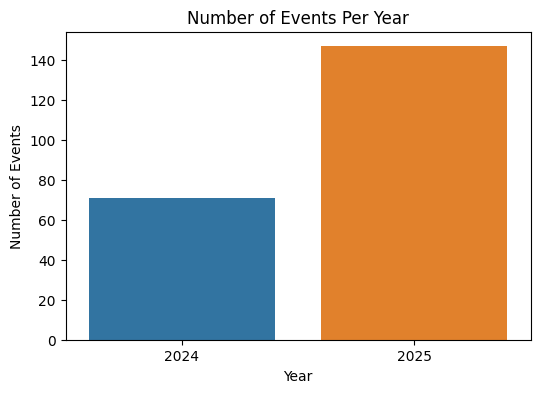

In [19]:
df['year'] = df['raceDate'].dt.year

events_per_year = df.groupby('year')['name'].nunique().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=events_per_year, x='year', y='name')
plt.title('Number of Events Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.show()

### Number of Participants per Year

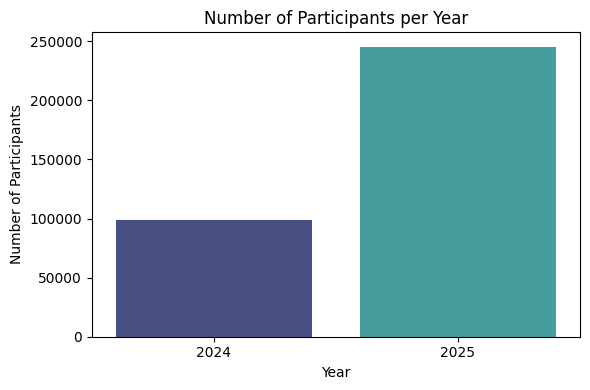

In [20]:
participants_per_year = df.groupby('year').size().reset_index(name='participants')

plt.figure(figsize=(6,4))
sns.barplot(data=participants_per_year, x='year', y='participants', palette='mako')

plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.title('Number of Participants per Year')
plt.tight_layout()
plt.show()

### Top 10 Race Categories per Year

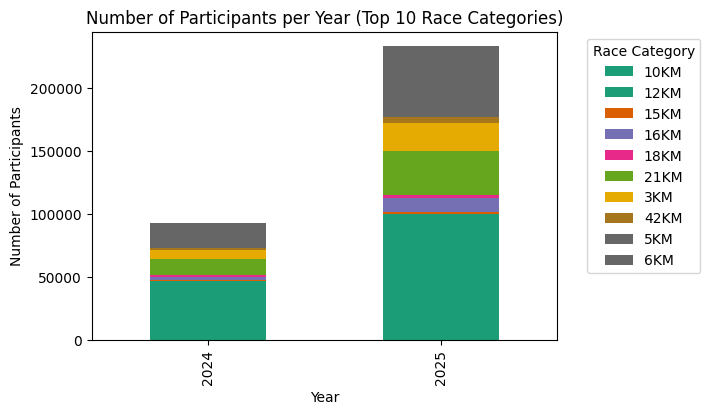

In [21]:
participants_per_year_cat = (df.groupby(['year','raceCategory_mapped']).size().reset_index(name='participants'))

top10_cat = (participants_per_year_cat.groupby('raceCategory_mapped')['participants'].sum().nlargest(10).index)
participants_top10 = participants_per_year_cat[participants_per_year_cat['raceCategory_mapped'].isin(top10_cat)]

pivot_df = participants_top10.pivot(index='year', columns='raceCategory_mapped', values='participants').fillna(0)

pivot_df.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Dark2')

plt.title('Number of Participants per Year (Top 10 Race Categories)')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.legend(title='Race Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout
plt.show()

### Treemap of Top 10 Race Categories

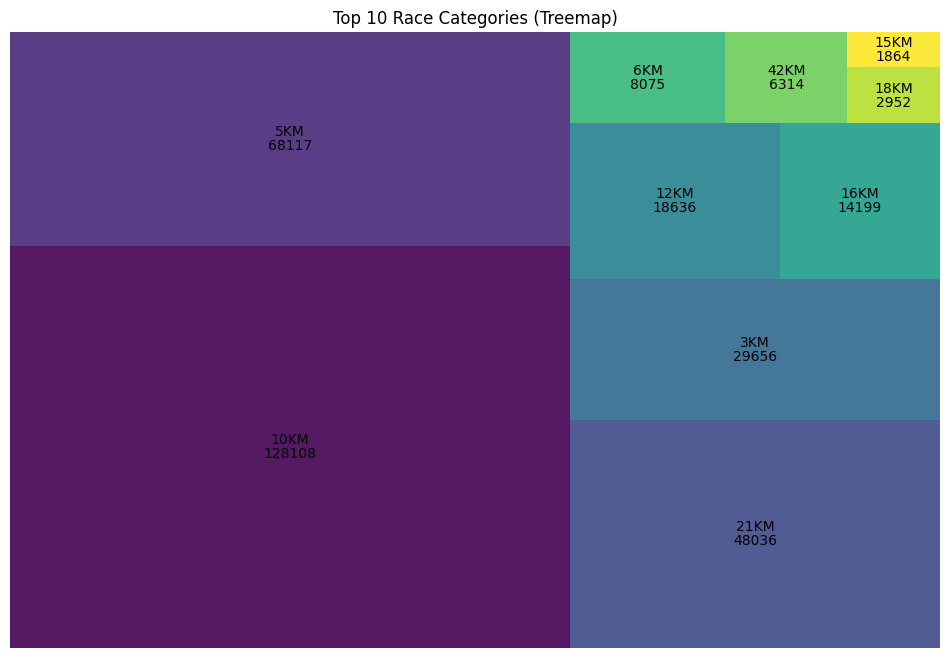

In [22]:
treemap = df['raceCategory_mapped'].value_counts().nlargest(10)

plt.figure(figsize=(12,8))
squarify.plot(
    sizes=treemap.values,
    label=treemap.index,
    value=treemap.values,
    alpha=0.9,
    color=plt.cm.viridis(np.linspace(0,1,len(treemap)))
)

plt.title('Top 10 Race Categories (Treemap)')
plt.axis('off')
plt.show()

### Gender Distribution of Participants

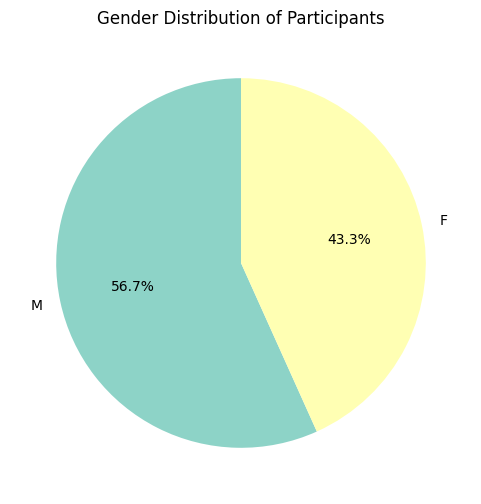

In [23]:
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index ,autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('Gender Distribution of Participants')
plt.show()

### Gender Distribution of Race Winners

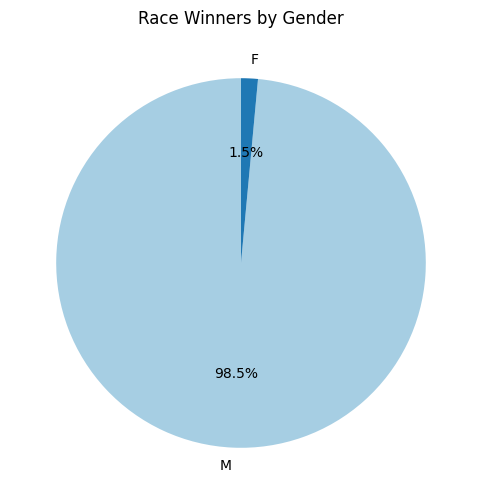

In [24]:
winners = df[df['rank'] == 1]
winner_counts = winners['gender'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(winner_counts, labels=winner_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Paired'))
plt.title('Race Winners by Gender')
plt.show()

### Top 10 Biggest Events by Number of Participants

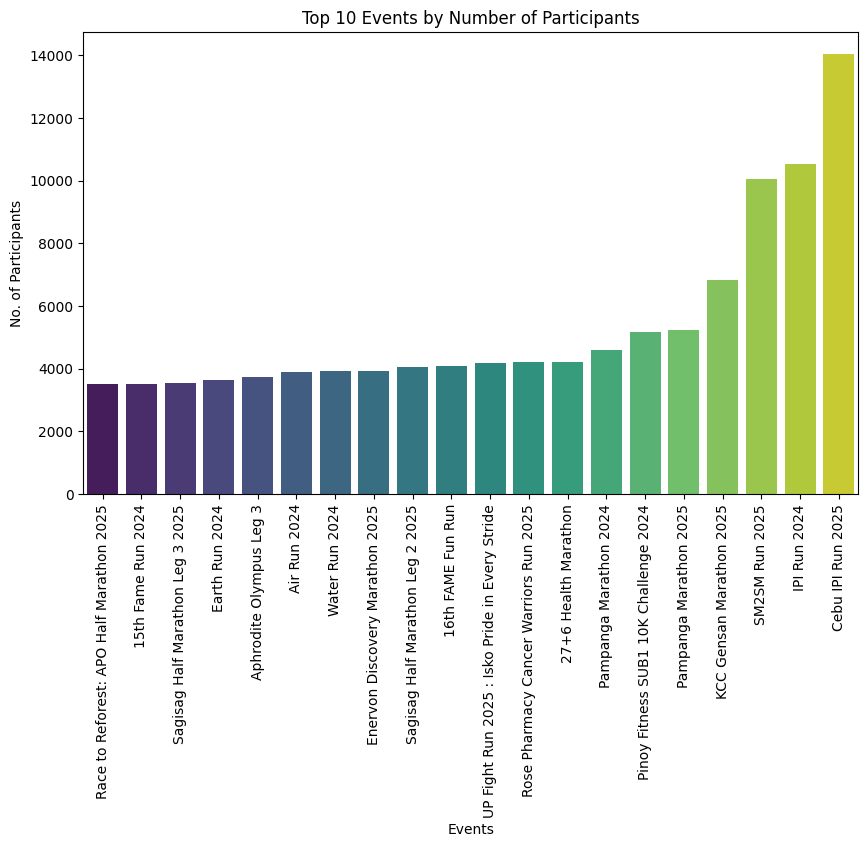

In [25]:
par_counts = df['name'].value_counts().head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=par_counts.index, y=par_counts.values, palette='viridis', order=par_counts.index[::-1])

plt.xlabel('Events')
plt.ylabel('No. of Participants')
plt.title('Top 10 Events by Number of Participants')
plt.xticks(rotation=90)
plt.show()

### Number of Monthly Events

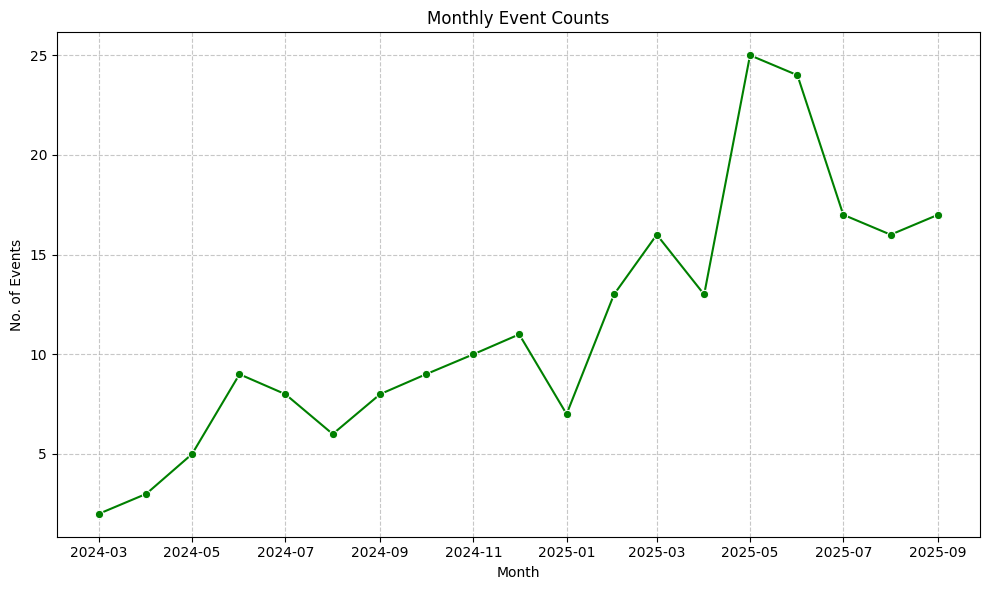

In [26]:
monthly_events = df.groupby(df['raceDate'].dt.to_period('M'))['name'].nunique()
monthly_events.index = monthly_events.index.to_timestamp()

plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_events.index, y=monthly_events.values, marker='o', color='green')
plt.xlabel('Month')
plt.ylabel('No. of Events')
plt.title('Monthly Event Counts')
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

### Count of Monthly Participants

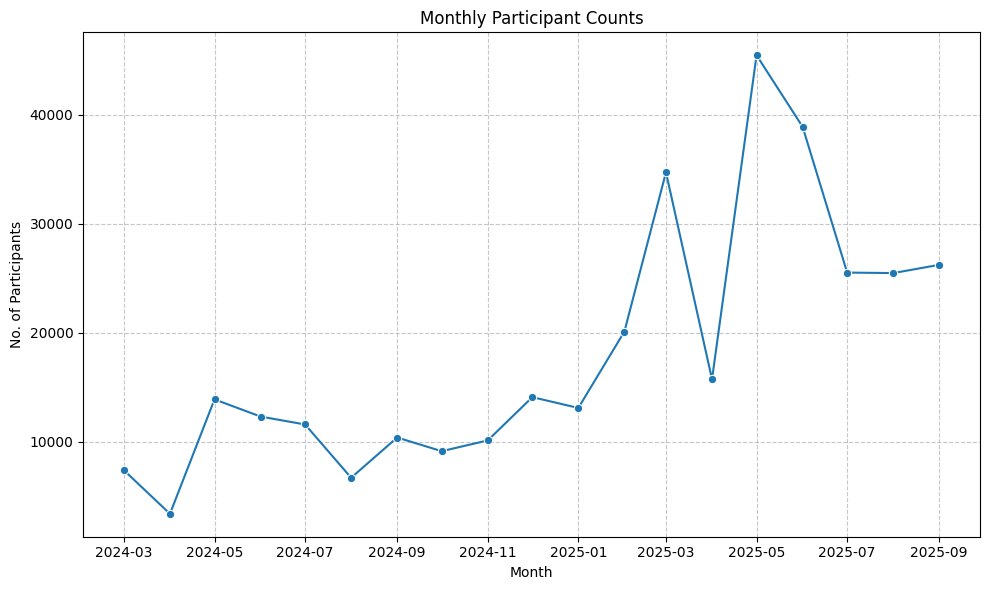

In [27]:
monthly = df.groupby(df['raceDate'].dt.to_period('M')).size()
monthly.index = monthly.index.to_timestamp()

plt.figure(figsize=(10,6))
sns.lineplot(x=monthly.index, y=monthly.values, marker='o')
plt.xlabel('Month')
plt.ylabel('No. of Participants')
plt.title('Monthly Participant Counts')
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

### Fastest Times in Selected Categories

In [28]:
categories = ['3KM', '5KM', '10KM', '16KM', '21KM','32KM', '42KM']

fastest_times = (
    df[(df['raceCategory_mapped'].isin(categories))
    & (df['name'] != 'Apollo Olympus Leg 1')
    & (df['gender'] == 'M')]
    .loc[lambda x: x.groupby('raceCategory_mapped')['gunTimeDisplay_parsed'].idxmin(),
        ['name','raceCategory_mapped','raceDate','gender','gunTimeDisplay_parsed']]
    .reset_index(drop=True)
)

fastest_times['raceCategory_mapped'] = pd.Categorical(
    fastest_times['raceCategory_mapped'],
    categories=categories,
    ordered=True
)

fastest_times = fastest_times.sort_values('raceCategory_mapped').reset_index(drop=True)
fastest_times

,name,raceCategory_mapped,raceDate,gender,gunTimeDisplay_parsed
0,Solemate PHC Charity Fun Run 2025,3KM,2025-02-09,M,0 days 00:09:08
1,KCC Gensan Marathon 2025,5KM,2025-08-30,M,0 days 00:14:11
2,Nueva Ecija Marathon 2025,10KM,2025-07-06,M,0 days 00:30:24
3,Capas 32 Challenge Leg 2,16KM,2025-08-24,M,0 days 00:53:47
4,MNL City Run 2024 Series: Time 2 Run 4ward Leg...,21KM,2024-03-17,M,0 days 01:09:15
5,KCC Gensan Marathon 2025,32KM,2025-08-30,M,0 days 01:53:40
6,PalawanPay Marathon 2024,42KM,2024-06-23,M,0 days 02:32:59


### Fastest Times in Selected Categories (Women)

In [29]:
female_fastest_times = (
    df[(df['raceCategory_mapped'].isin(categories))
    & (df['name'] != 'Apollo Olympus Leg 1')
    & (df['gender'] == 'F')]
    .loc[lambda x: x.groupby('raceCategory_mapped')['gunTimeDisplay_parsed'].idxmin(),
        ['name','raceCategory_mapped','raceDate','gender','gunTimeDisplay_parsed']]
    .reset_index(drop=True)
)

female_fastest_times['raceCategory_mapped'] = pd.Categorical(
    female_fastest_times['raceCategory_mapped'],
    categories=categories,
    ordered=True
)

female_fastest_times = female_fastest_times.sort_values('raceCategory_mapped').reset_index(drop=True)
female_fastest_times

,name,raceCategory_mapped,raceDate,gender,gunTimeDisplay_parsed
0,Solemate PHC Charity Fun Run 2025,3KM,2025-02-09,F,0 days 00:11:37
1,Global Surveyor’s Day Fun Run 2025,5KM,2025-03-23,F,0 days 00:18:34
2,Pinoy Fitness SUB1 10K Challenge 2024,10KM,2024-03-17,F,0 days 00:38:06
3,Angel’s Pizza Sama-Sama Run 2025,16KM,2025-01-12,F,0 days 01:04:07
4,SM2SM Run 2025,21KM,2025-03-09,F,0 days 01:23:24
5,KCC Gensan Marathon 2025,32KM,2025-08-30,F,0 days 02:18:28
6,Bukidnon International Marathon 2025,42KM,2025-04-20,F,0 days 03:08:34


### Average Times in Selected Categories by Gender

In [30]:
average_times = (
    df[(df['raceCategory_mapped'].isin(categories))
       & (df['name'] != 'Apollo Olympus Leg 1')]
    .groupby(['raceCategory_mapped', 'gender'], as_index=False)['gunTimeDisplay_parsed']
    .mean()
)

average_times['gunTimeDisplay_parsed'] = average_times['gunTimeDisplay_parsed'].apply(
    lambda x: str(x).split('.')[0]
)

average_times['raceCategory_mapped'] = pd.Categorical(
    average_times['raceCategory_mapped'],
    categories=categories,
    ordered=True
)

average_times = average_times.sort_values(['raceCategory_mapped', 'gender']).reset_index(drop=True)
average_times

,raceCategory_mapped,gender,gunTimeDisplay_parsed
0,3KM,F,0 days 00:45:51
1,3KM,M,0 days 00:55:12
2,5KM,F,0 days 00:54:58
3,5KM,M,0 days 00:49:10
4,10KM,F,0 days 01:37:20
5,10KM,M,0 days 01:24:33
6,16KM,F,0 days 02:20:35
7,16KM,M,0 days 02:04:44
8,21KM,F,0 days 02:58:38
9,21KM,M,0 days 02:38:48
